In [1]:
__author__ = "@Tssp"
__date__   = "14/04/21"
import sympy as sp
from sympy.functions.special.polynomials import chebyshevt
from sympy.abc import n, x
import matplotlib.pyplot as plt
import numpy as np

The Chebyshev polynomial of first kind, $T_k(x)$, is the polynomial of degree k defined in
the range $x \in [−1, 1]$ by the relation
$$T_k(x) = cos(k\ arccos(x))$$

Therefore, $−1 \leq T_k(x) \leq 1$. By setting $x = cos(z)$, we have
$$T_k(z) = cos(kz)$$

$n=0$

In [2]:
chebyshevt(0, x)

1

$n=1$

In [3]:
chebyshevt(1, x)

x

$n=2$

In [4]:
chebyshevt(2, x)

2*x**2 - 1

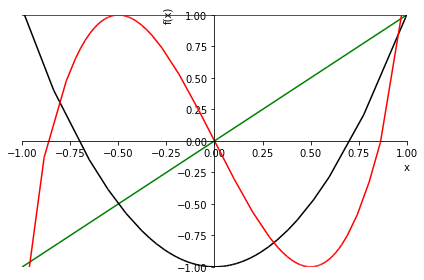

In [5]:
p0 = sp.plotting.plot(chebyshevt(0, x), xlim=(-1, 1), ylim=(-1,1), show=False, line_color='b')
p1 = sp.plotting.plot(chebyshevt(1, x), xlim=(-1, 1), ylim=(-1,1), show=False, line_color='g')
p2 = sp.plotting.plot(chebyshevt(2, x), xlim=(-1, 1), ylim=(-1,1), show=False, line_color='k')
p3 = sp.plotting.plot(chebyshevt(3, x), xlim=(-1, 1), ylim=(-1,1), show=False, line_color='r')
p0.append(p1[0])
p0.append(p2[0])
p0.append(p3[0])
p0.show()

From the trigonometric identity

$$cos(k + 1)z + cos(k − 1)z = 2 cos(z) cos(kz) ,$$

it can be obtained the recurrence relationship

$$T_{k+1}(x) = 2xT_k(x) − T_{k−1}(x), k ≥ 1$$

which allows to deduce, in particular, the expression of the polynomials $T_k$, $k ≥ 2$ from the knowledge of $T_0$ and $T_1$.

The Chebyshev polynomials constitute a complete basis of orthogonal polynomials in the interval $[−1, 1]$ with weight $\frac{1}{\sqrt{1 − x^2}}$,

$$\int^1_{-1}dx\frac{T_i(x) T_j(x)}{\sqrt{1-x^2}} = \frac{\pi}{2} a_i \delta_{ij}$$,

where $a_i = 2$ for $i=0$ and $1$ for $i>0$

In [6]:
sp.integrate(chebyshevt(0, x) * chebyshevt(0, x)/sp.sqrt(1 - x**2), (x, -1, 1))

pi

In [7]:
sp.integrate(chebyshevt(1, x) * chebyshevt(1, x)/sp.sqrt(1 - x**2), (x, -1, 1))

pi/2

In [8]:
sp.integrate(chebyshevt(0, x) * chebyshevt(1, x)/sp.sqrt(1 - x**2), (x, -1, 1))

0

In [9]:
sp.integrate(chebyshevt(0, x) * chebyshevt(2, x)/sp.sqrt(1 - x**2), (x, -1, 1))

0

The completeness property tells us that in general any function $f(x)$ can be represented as a linear combination of Chebyshev polynomials,

$$\sum^M_{m=0} c_m T_m(x)$$

Then, making use of the orthogonality of the Chebyshev polynomials the expansion coefficients cm can be evaluated from

$$c_m = \frac{2}{\pi a_m}\int^1_{-1}dx\frac{f(x) T_m(x)}{\sqrt{1-x^2}} $$

In [10]:
def Chebyshev_Expansion(f, order):
    '''
    Parameters
    ----------
    f: function to expand in terms of the Chebyshev polynomials f(x)
    m: order of expansion
    
    Returns
    -------
    C: Expanded function
    '''
    C = 0
    for m in range(order):
        if m == 0: am = 2
        elif m>0: am=1
        cm = 2/(np.pi*am) * sp.integrate(f*chebyshevt(m, x)/sp.sqrt(1 - x**2), (x,-1,1)).evalf()
        C += cm * chebyshevt(m, x)
    print(C)
    return C

In [11]:
C_exp = Chebyshev_Expansion(sp.exp(x), 3)

0.542990679068153*x**2 + 1.13031820798497*x + 0.994570538217932


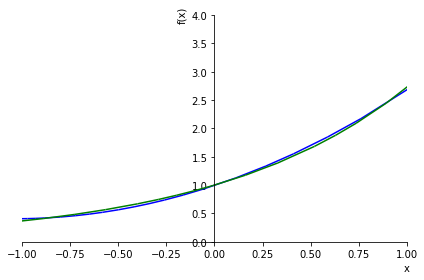

In [12]:
p1 = sp.plotting.plot(C_exp, xlim=(-1, 1), ylim=(0,4), show=False, line_color='b')
p2 = sp.plotting.plot(sp.exp(x), xlim=(-1, 1), ylim=(0,4), show=False, line_color='g')
p1.append(p2[0])
p1.show()

In [60]:
g = sp.Piecewise( (1/2, x<=-1/2), (x**4, x<=1/2), (1/2, x<=1) )
g

Piecewise((0.5, x <= -0.5), (x**4, x <= 0.5), (0.5, x <= 1))

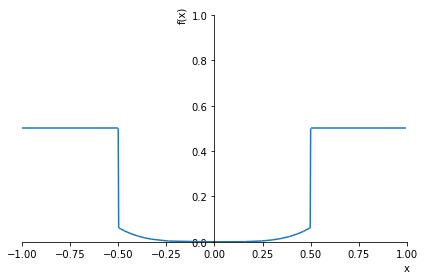

In [61]:
sp.plotting.plot(g, xlim=(-1,1), ylim=(0,1))

In [66]:
g_exp = Chebyshev_Expansion(g, 3)

0.540081669116505*x**2 + 0.0676893029015636


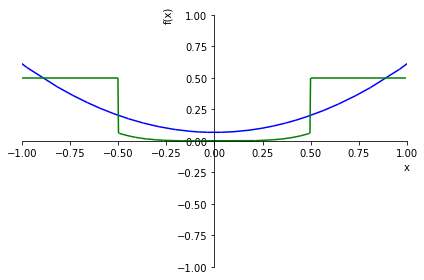

In [67]:
p1 = sp.plotting.plot(g_exp, xlim=(-1, 1), ylim=(-1,1), show=False, line_color='b')
p2 = sp.plotting.plot(g, xlim=(-1, 1), ylim=(-1,1), show=False, line_color='g')
p1.append(p2[0])
p1.show()